# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#可將資料分成training、test 
#利用training製作出f(X)
#(可利用training內部數值自行調整出適合的函數，例如使用mse)
#利用test資料找出mse，此為答案

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [6]:
from sklearn.model_selection import train_test_split#分成training、test
from sklearn.linear_model import LinearRegression#線型函數學習

In [7]:
x = np.linspace(0, 5, 50)#0-5取50個數
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)#調整random讓數據有一定差別，random.randn總之就是隨機
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)#把train、test區分0.8/0.2
print(x_train)
#random_state是一個隨機種子，是在任意帶有隨機性的類或函數里作為參數來控制隨機模式。

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [8]:
y

array([ 0.97527599, -0.25823176,  1.32286598,  0.86009722,  0.70482684,
        1.90711293,  2.10981232,  2.62425773,  1.91479645,  2.81917607,
        2.76750311,  2.45228683,  1.89055522,  3.40451773,  3.45238671,
        2.49684846,  2.75170958,  2.57320157,  2.96426379,  3.01270161,
        2.76390023,  3.86874255,  3.59348985,  1.61134158,  3.98579717,
        3.7805454 ,  3.3590446 ,  4.82364473,  4.11286444,  5.08021916,
        4.94834664,  4.63251788,  4.40917761,  4.01534217,  4.8929136 ,
        3.98582574,  5.46206066,  5.8096021 ,  5.710769  ,  6.31304313,
        6.44287117,  6.07309114,  5.29604644,  6.34873427,  6.24846997,
        6.57231247,  6.9633718 ,  7.15924204,  7.43191614,  6.74807915])

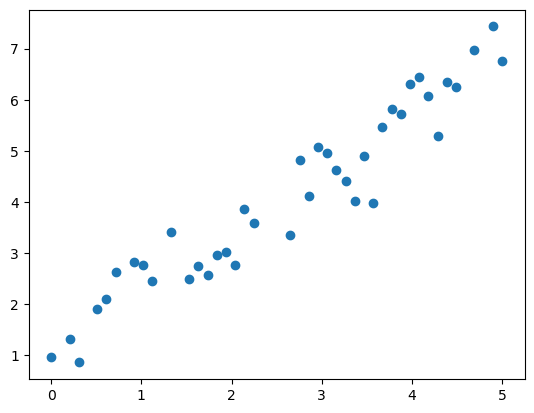

In [9]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [10]:
regr = LinearRegression()
X_train = x_train.reshape(-1,1)#2維
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)#斜率
print('interception: ', regr.intercept_)#截距
#根源資料1.2/0.8有些許落差

Coefficients:  [1.15312007]
interception:  1.1030441321486912


In [11]:
Y_train = regr.predict(X_train)
#進行預測


In [12]:
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)
#均方差

0.24763451174189396


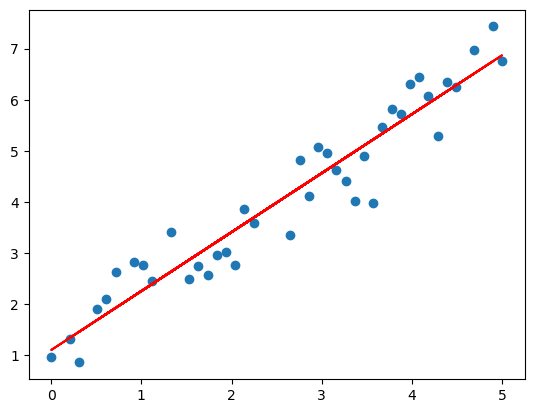

In [13]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')
#原圖與預測圖比對

#### test with test data

In [22]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(Y_test)

[2.57945787 2.79530203 1.71608125 2.14776956 6.14088644 1.39231501
 3.98244488 3.87452281 6.3567306  3.76660073]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [23]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.57945787],
       [2.79530203],
       [1.71608125],
       [2.14776956],
       [6.14088644],
       [1.39231501],
       [3.98244488],
       [3.87452281],
       [6.3567306 ],
       [3.76660073]])

In [24]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)
#mse=0.4>mse=0.3

0.4443198676358283


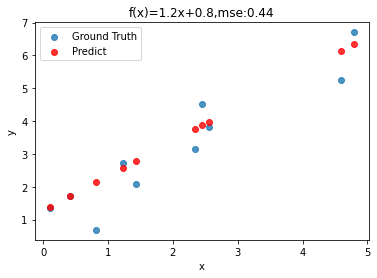

In [25]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()